In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
import plotly.express as px

In [7]:
experiment_group_df = pd.read_excel(r'D:\DO_NOT_REMOVE\Data_Analyst_Junior\21\extended_df.xlsx')
experiment_group_df.head()

,contract_id,contract_num,product_name,client_id,contract_status,currency_name,duration,country,price,insurance_amount,last_name,age,sex,loss_name,loss_payout_amt,price_USD,insurance_amount_USD,loss_payout_amt_USD,group,experiment_id
0,21111219,ТТЕ7227715*****,Страхование путешественников,10161870404,Действует,Российский рубль,10,Беларусь,1096,2000000,А*****,20,M,Иное,0,87680,160000000,0,test,policy_pricing
1,21111381,ТТЕ7227715*****,Страхование путешественников,1017159879,Действует,Российский рубль,7,Индонезия,1918,5000000,З*****,55,M,Иное,0,153440,400000000,0,control,policy_pricing
2,21112353,БАДАМСТЕ55*****,Страхование путешественников,10161883357,Действует,Российский рубль,10,Беларусь,1096,2000000,Б*****,61,F,Иное,0,87680,160000000,0,control,policy_pricing
3,21113224,ТТЕ7227715*****,Страхование путешественников,100766461,Действует,Российский рубль,14,Грузия,1534,2000000,И*****,25,M,Иное,0,122720,160000000,0,control,policy_pricing
4,21113292,ТТЕ7227715*****,Страхование путешественников,10171604758,Действует,Российский рубль,7,Аргентина,1918,5000000,З*****,33,M,Иное,0,153440,400000000,0,control,policy_pricing


In [8]:
# Set up the plotting environment
sns.set(style="whitegrid")

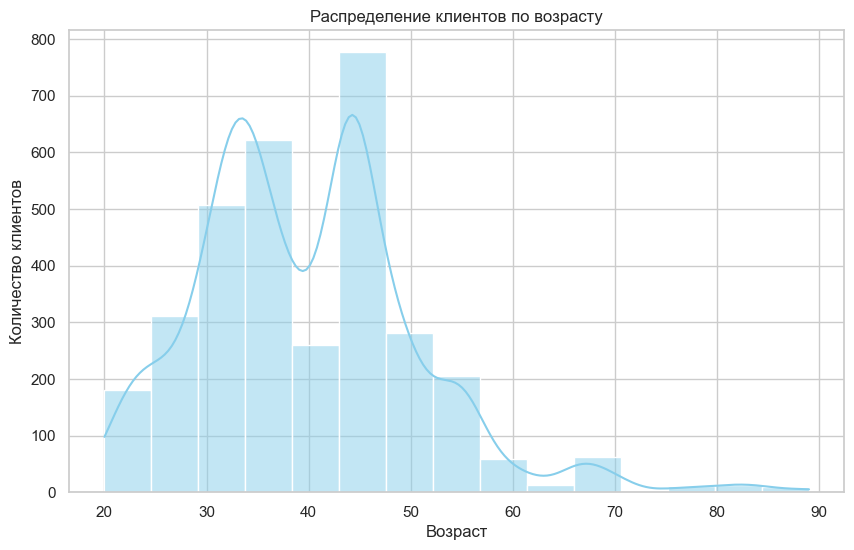

In [27]:
# 1. Distribution of clients by age
plt.figure(figsize=(10, 6))
sns.histplot(experiment_group_df['age'], bins=15, kde=True, color="skyblue")
plt.title("Распределение клиентов по возрасту")
plt.xlabel("Возраст")
plt.ylabel("Количество клиентов")
plt.show()

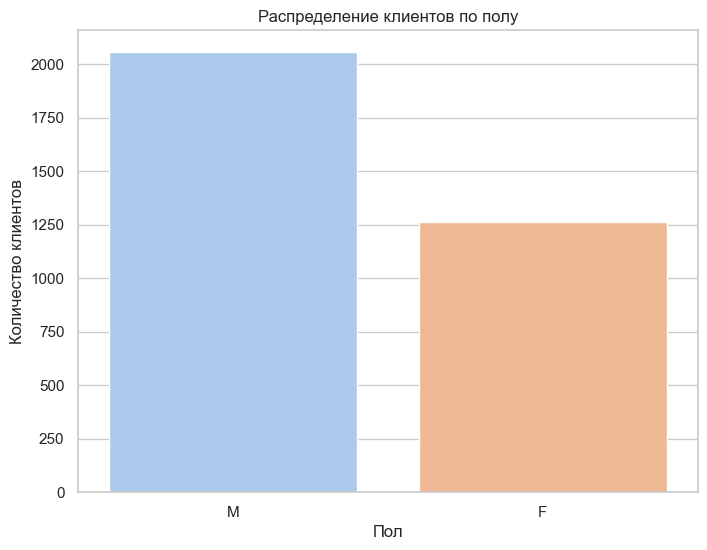

In [11]:
# 2. Distribution of clients by gender
plt.figure(figsize=(8, 6))
sns.countplot(data=experiment_group_df, x='sex', palette='pastel')
plt.title("Распределение клиентов по полу")
plt.xlabel("Пол")
plt.ylabel("Количество клиентов")
plt.show()

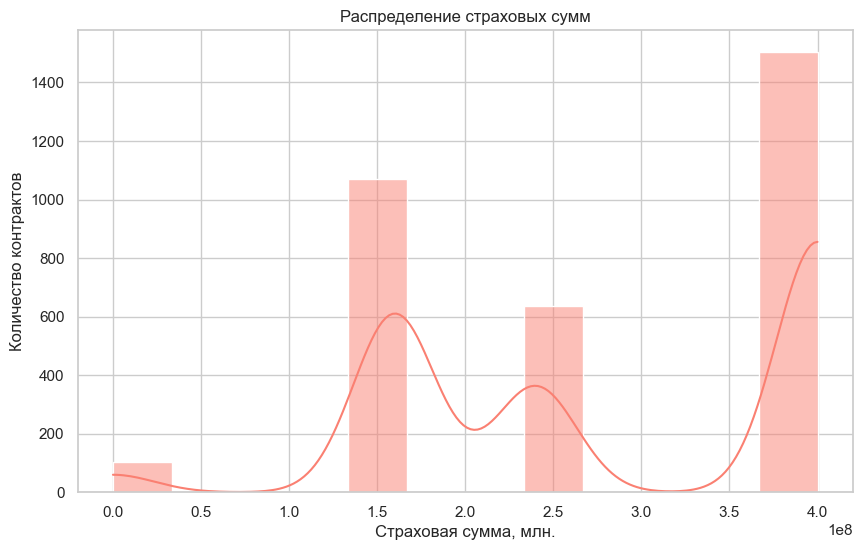

In [35]:
# 3. Analysis of insurance amounts
plt.figure(figsize=(10, 6))
sns.histplot(experiment_group_df['insurance_amount_USD'], bins=12, kde=True, color="salmon")
plt.title("Распределение страховых сумм")
plt.xlabel("Страховая сумма, млн.")
plt.ylabel("Количество контрактов")
plt.show()

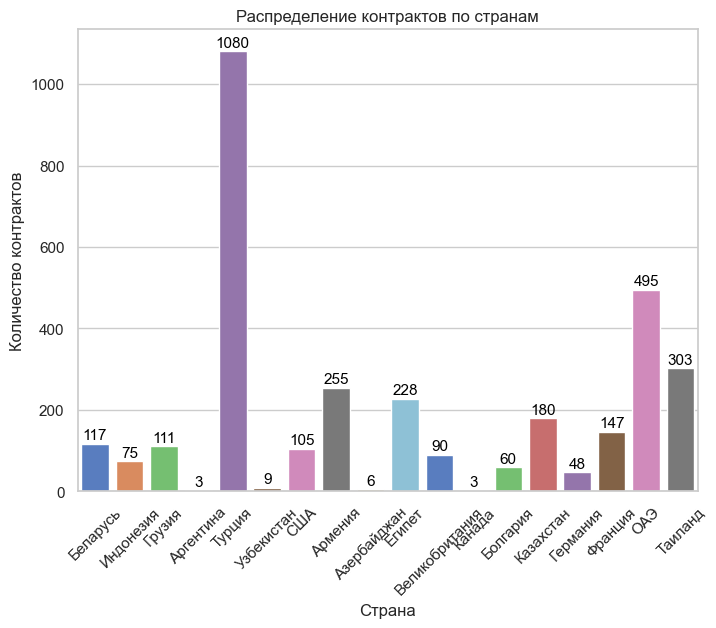

In [22]:
# 4. Analysis of contract statuses
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=experiment_group_df, x='country', palette='muted')
plt.title("Распределение контрактов по странам")
plt.xlabel("Страна")
plt.ylabel("Количество контрактов")
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 3), 
                textcoords='offset points')

plt.show()

In [37]:
# Подготовка данных, группировка по странам и подсчет количества контрактов
country_counts = experiment_group_df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Сортировка данных по количеству контрактов (от меньшего к большему)
country_counts = country_counts.sort_values(by='count', ascending=True)

# Построение графика воронки
fig = px.funnel(country_counts, 
                x='count', 
                y='country',
                color_discrete_sequence=['#1f77b4'])  # Единый цвет

fig.update_layout(title='Распределение контрактов по странам',
                  xaxis_title='Количество контрактов',
                  yaxis_title='Страна')

fig.show()

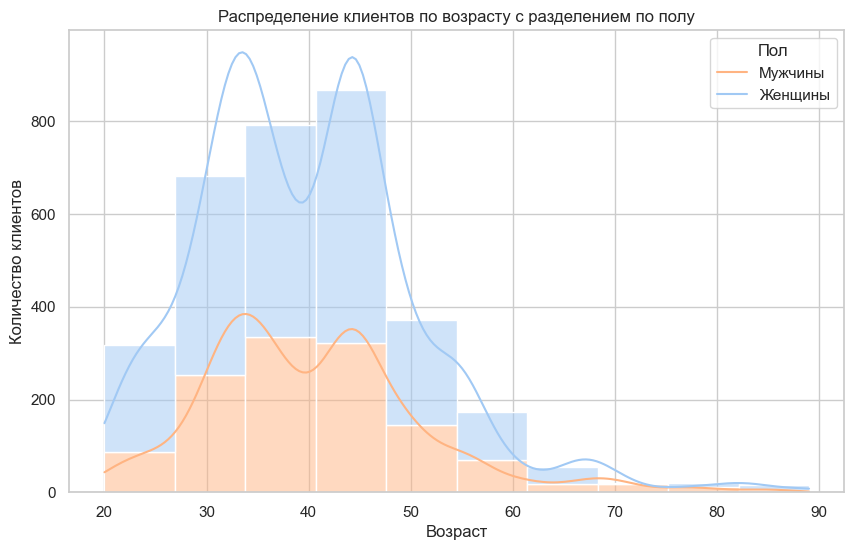

In [28]:
plt.figure(figsize=(10, 6))

# Построение гистограммы с разделением по полу
sns.histplot(data=experiment_group_df, x='age', hue='sex', bins=10, kde=True, palette='pastel', multiple='stack')

plt.title("Распределение клиентов по возрасту с разделением по полу")
plt.xlabel("Возраст")
plt.ylabel("Количество клиентов")
plt.legend(title='Пол', labels=['Мужчины', 'Женщины'])
plt.show()

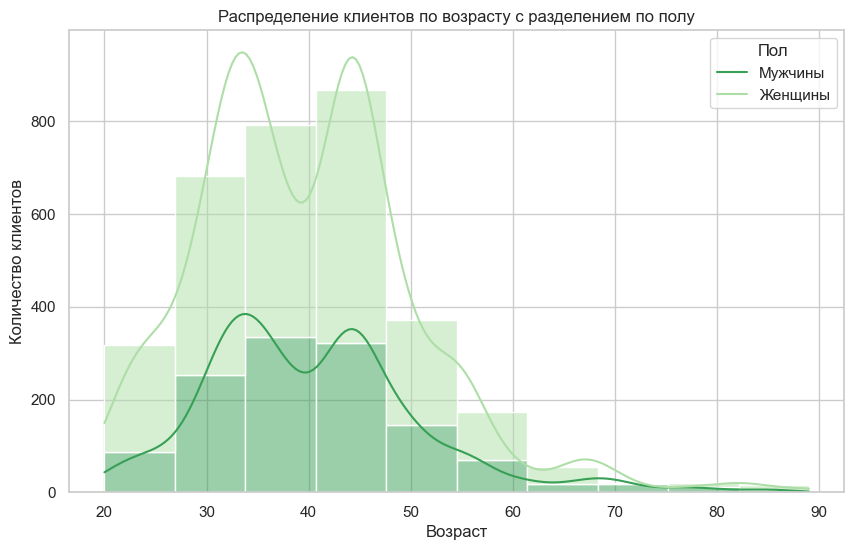

In [38]:
plt.figure(figsize=(10, 6))

# Определите палитру с оттенками зеленого
green_palette = sns.color_palette("Greens", n_colors=2)

# Построение гистограммы с разделением по полу
sns.histplot(data=experiment_group_df, x='age', hue='sex', bins=10, kde=True, palette=green_palette, multiple='stack')

plt.title("Распределение клиентов по возрасту с разделением по полу")
plt.xlabel("Возраст")
plt.ylabel("Количество клиентов")
plt.legend(title='Пол', labels=['Мужчины', 'Женщины'])
plt.show()